## Exploratory Data Analysis

#### Introduction
The central aim is to employ this data chain for the purpose of anomaly detection, particularly in the context of tracking and identifying cyberattacks. To achieve this goal, the project will leverage the "Hardware In The Loop" dataset, offering an opportunity to explore the intricacies of cybersecurity data in a controlled and experimental environment. 

In [1]:
from data_analysis import *

# output for notebook with seaborn
%matplotlib inline

In [2]:
NET_COLS = ["dport", "proto", "flags", "size", "modbus_fn", "n_pkt_src", "n_pkt_dst", "modbus_response"]

## 1. Loading the dataset

In [3]:
from preprocessing import *

net_attack = load_network_csv(["dataset/Network datatset/csv/attack_1.csv",
                               "dataset/Network datatset/csv/attack_2.csv",
                               "dataset/Network datatset/csv/attack_3.csv"])
phy_attack = load_physical_csv(["dataset/Physical dataset/phy_att_1.csv",
                                "dataset/Physical dataset/phy_att_2.csv",
                                "dataset/Physical dataset/phy_att_3.csv"])
                                #"dataset/Physical dataset/phy_norm.csv"

### 1.1 Physical attacks

In [4]:
eda = EDA(phy_attack, phy_attack._get_numeric_data().columns, phy_attack.select_dtypes(include=['object']).columns)

Index(['Tank_1', 'Tank_2', 'Tank_3', 'Tank_4', 'Tank_5', 'Tank_6', 'Tank_7',
       'Tank_8', 'Flow_sensor_1', 'Flow_sensor_2', 'Flow_sensor_4'],
      dtype='object')
Index(['Pump_1', 'Pump_2', 'Pump_3', 'Pump_4', 'Pump_5', 'Pump_6', 'Valv_1',
       'Valv_2', 'Valv_3', 'Valv_4', 'Valv_5', 'Valv_6', 'Valv_7', 'Valv_8',
       'Valv_9', 'Valv_10', 'Valv_11', 'Valv_12', 'Valv_13', 'Valv_14',
       'Valv_15', 'Valv_16', 'Valv_17', 'Valv_18', 'Valv_19', 'Valv_20',
       'Valv_21', 'Valv_22', 'label'],
      dtype='object')


In this notebook, we utilize the `data_analysis` library to conduct an in-depth exploration of the dataset pertaining to physical attacks. The decision to employ a library was driven by the substantial size of the network data and the need for functionality that can be reused across multiple datasets.

#### Data Analysis Objectives

The primary aim of our data analysis is to gain insights into the dataset that will inform the development of tailored data preprocessing steps and the selection of an appropriate model. This will be achieved through the following steps:

1. **Label Analysis**:
    - Determine the count of unique labels.
    - Examine the distribution of the instances across these labels.

2. **Feature Analysis**:
    - Ascertain the count of distinct features.
    - Investigate the distribution of the values within these features.

3. **Correlation Assessment**:
    - Identify and quantify the interdependencies between different features.

4. **Comparative Feature Analysis**:
    - Contrast and compare how features vary amongst the different labels.

The following sections will implement these steps and discuss the findings.


/home/vlad/ing3/Leclerc_SXXI/data_analysis.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cat_col, data=df, palette="Set2",


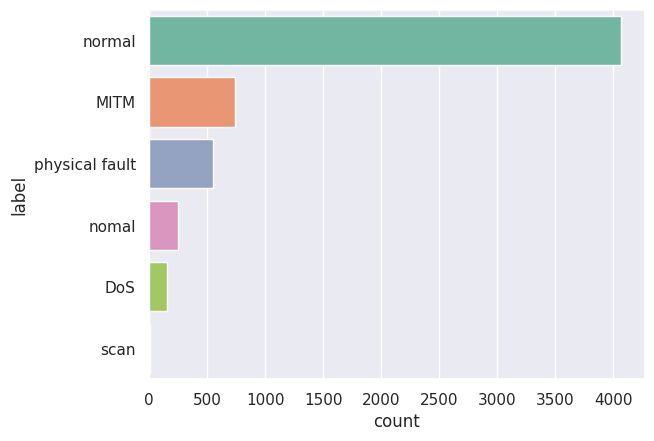

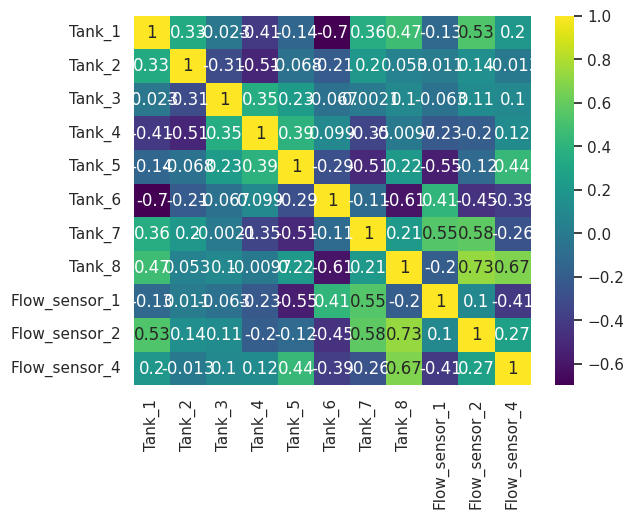

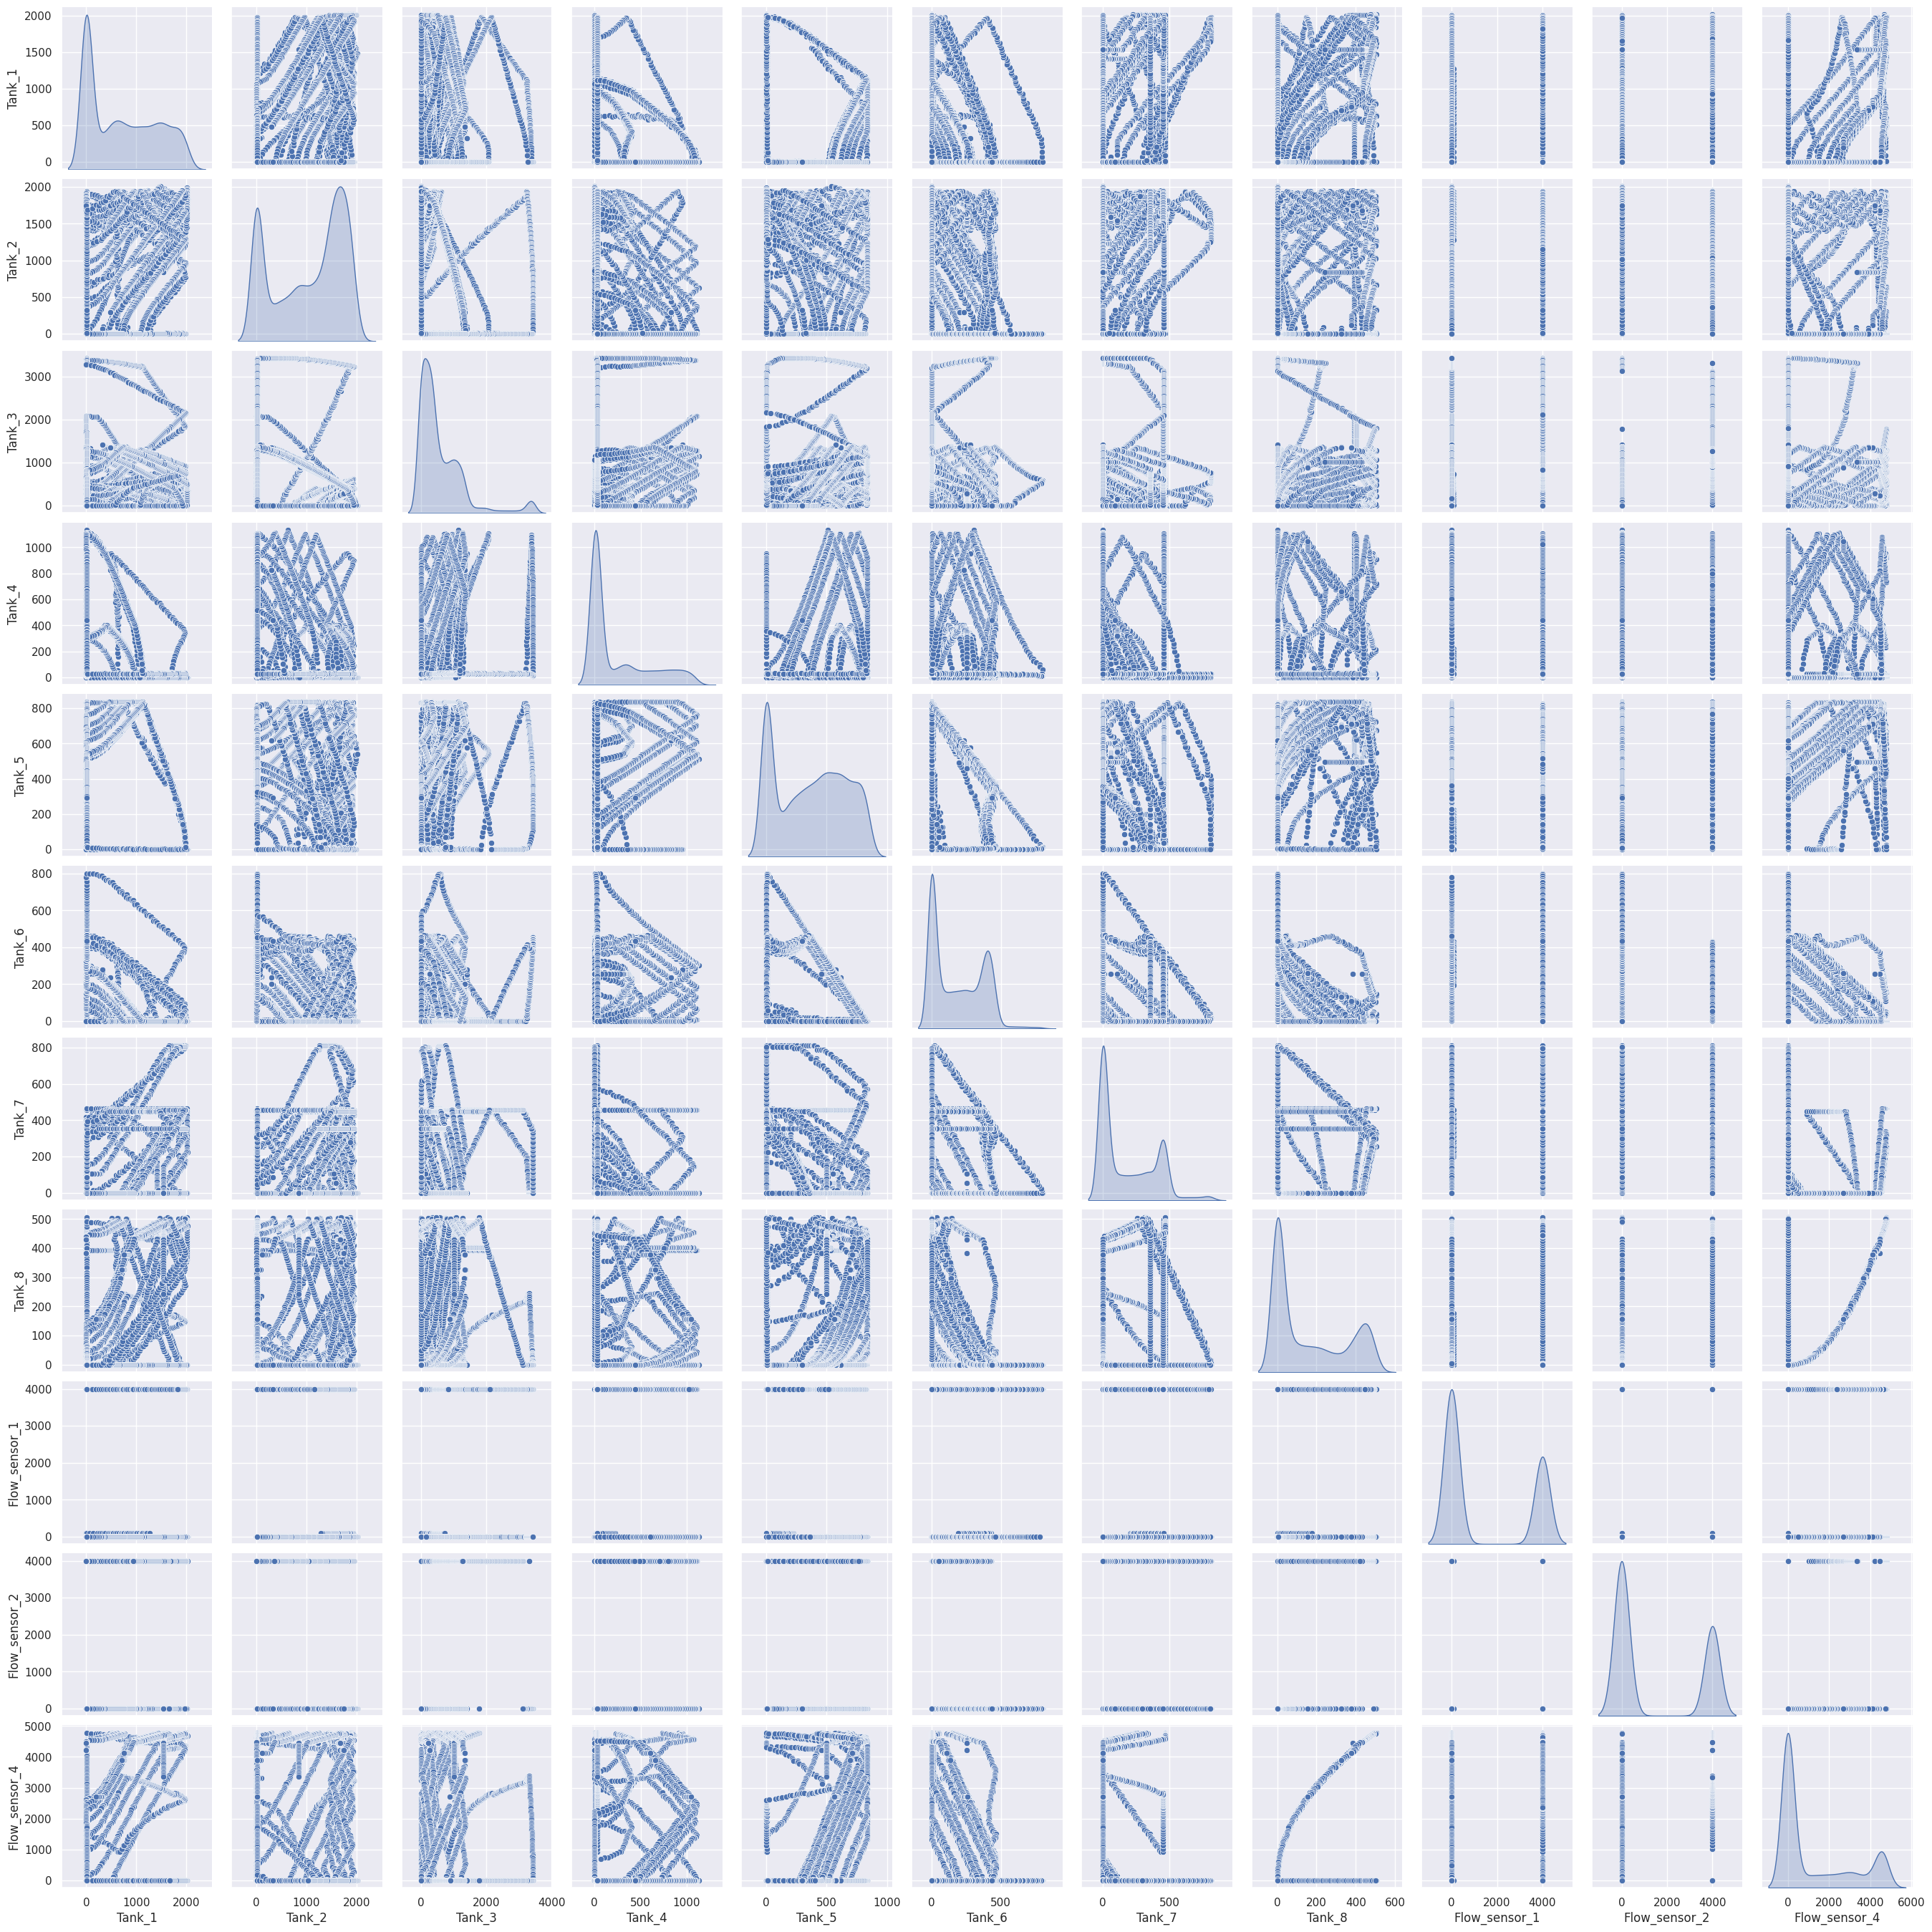

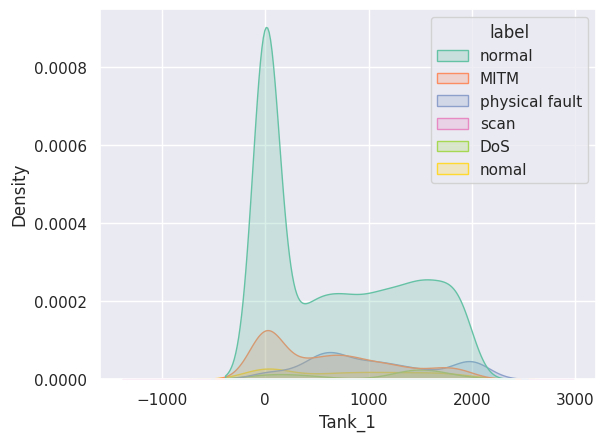

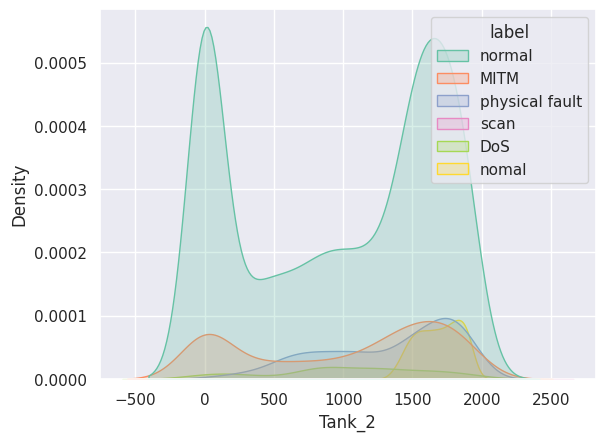

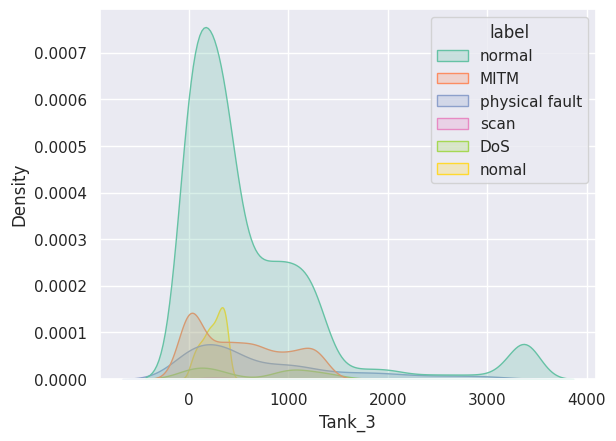

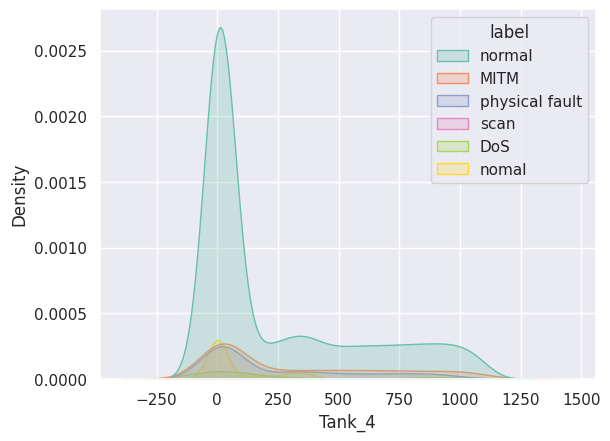

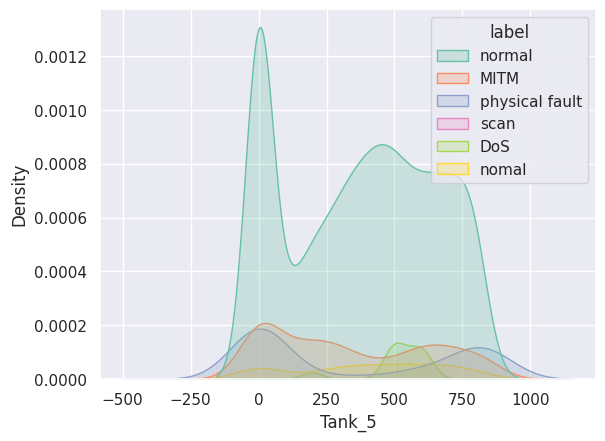

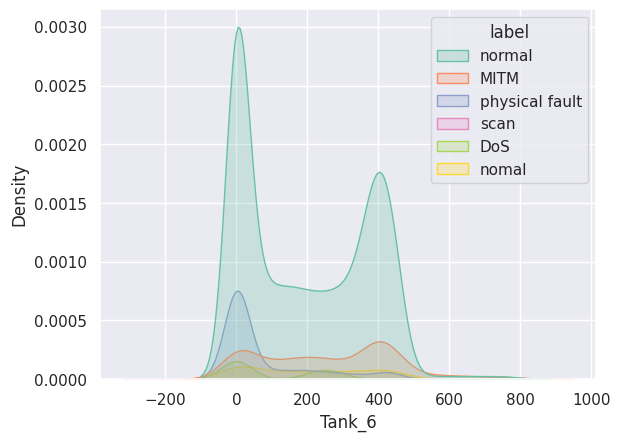

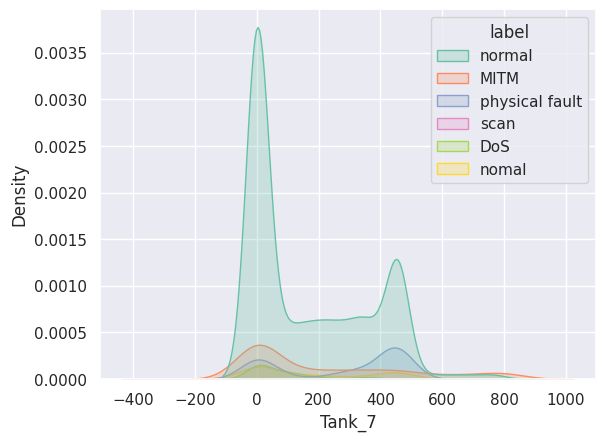

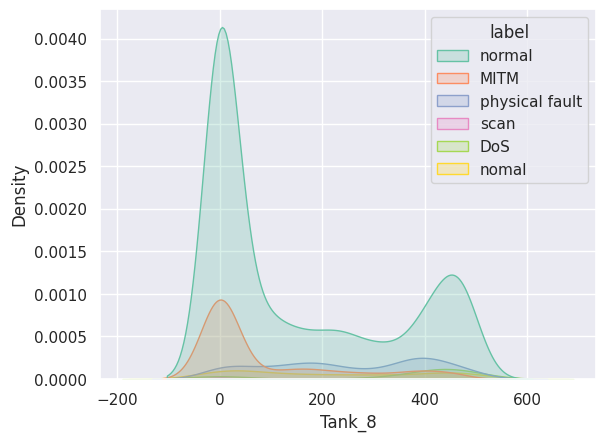

/home/vlad/ing3/Leclerc_SXXI/data_analysis.py:84: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=num_columns[idx], hue=hue,


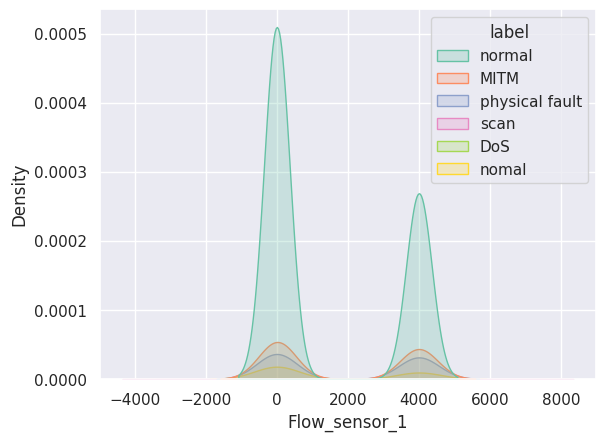

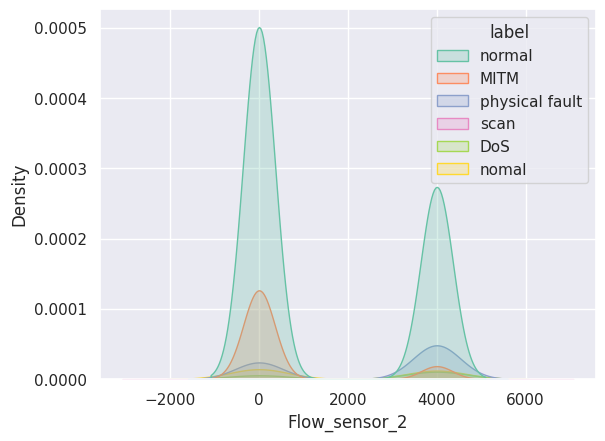

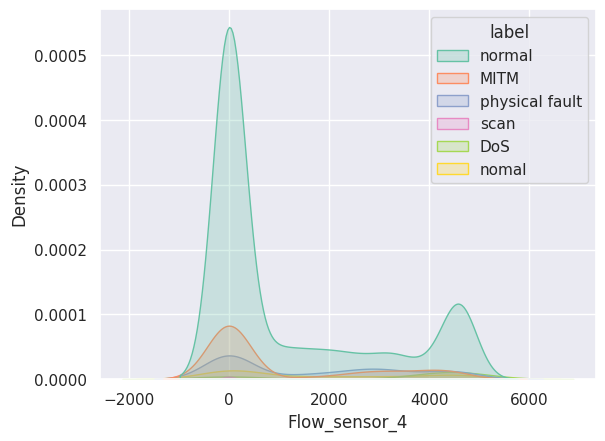

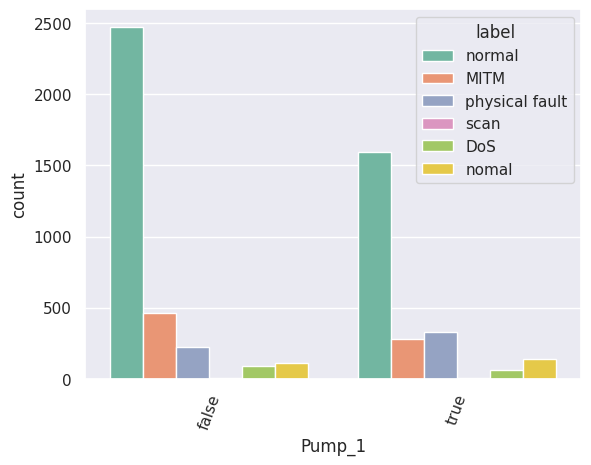

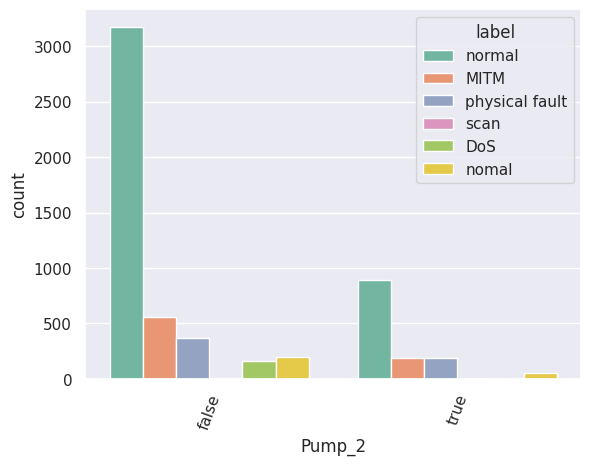

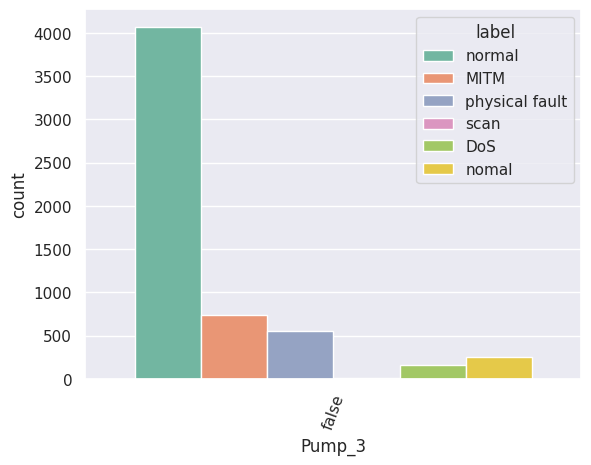

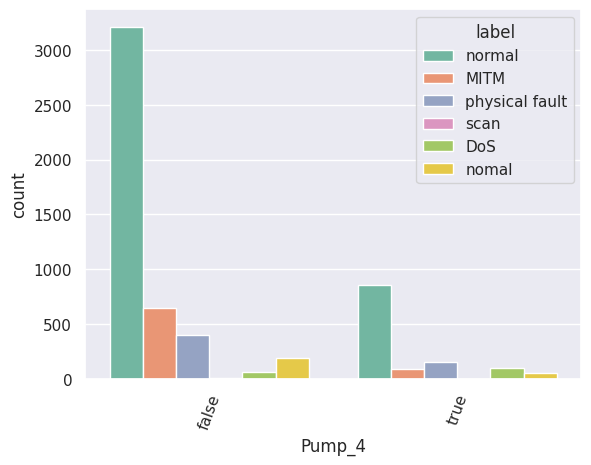

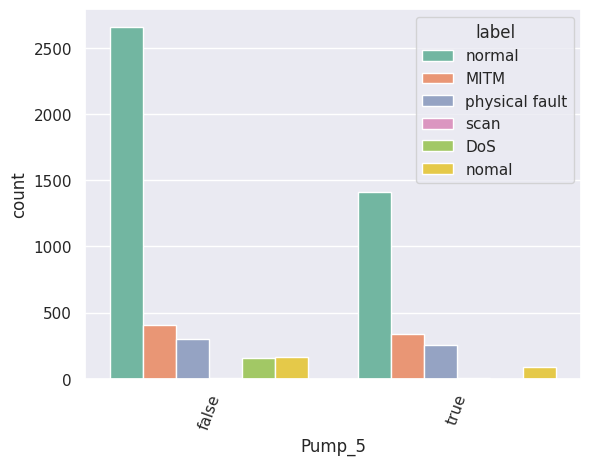

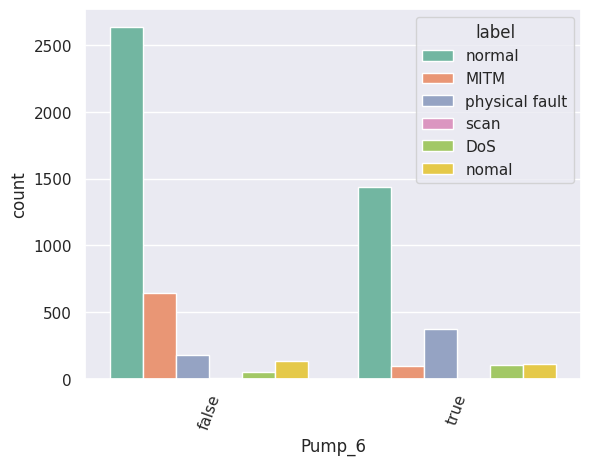

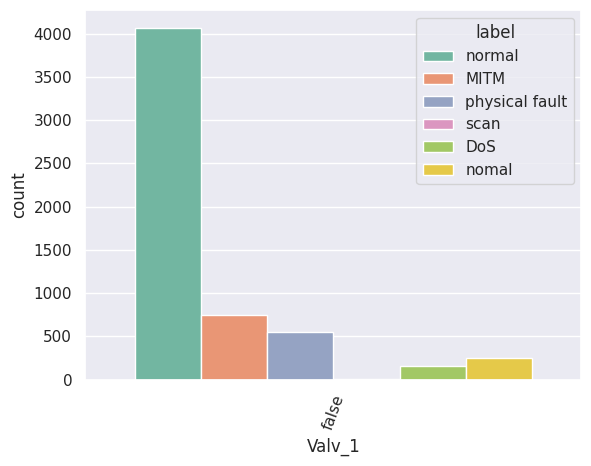

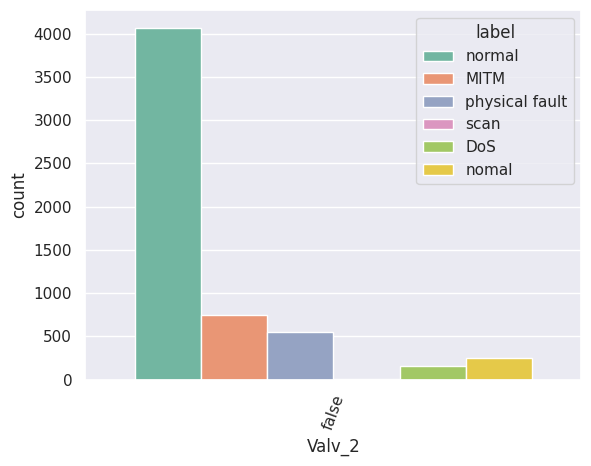

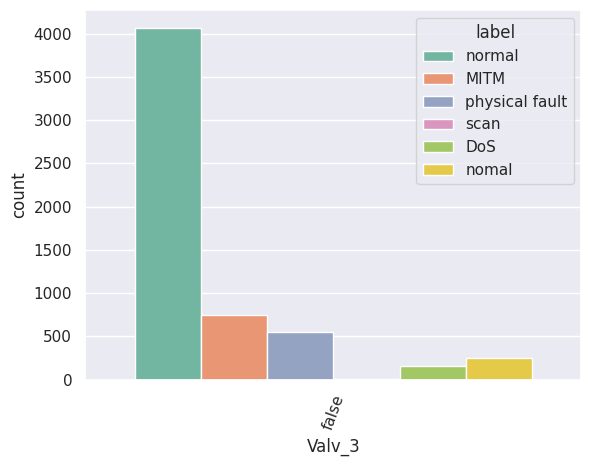

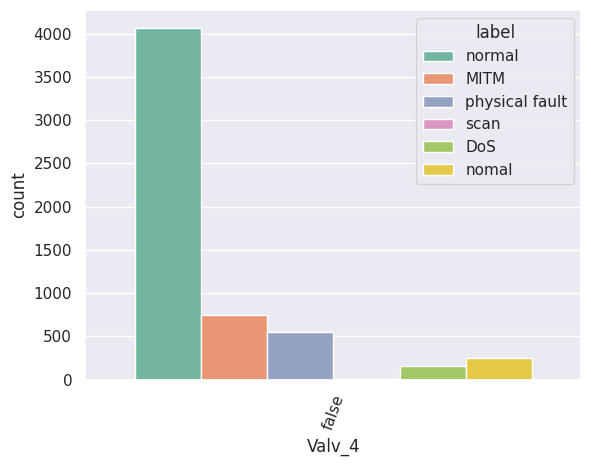

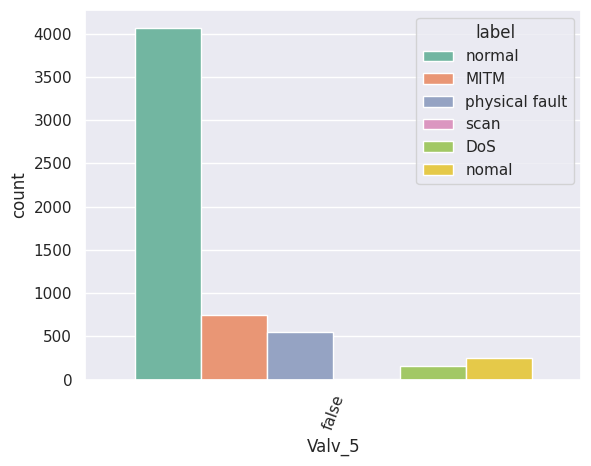

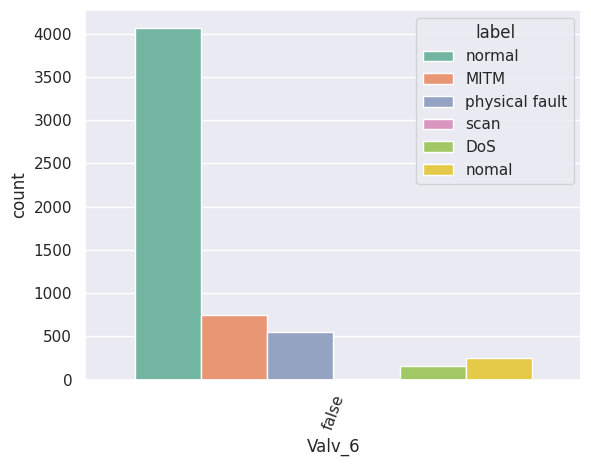

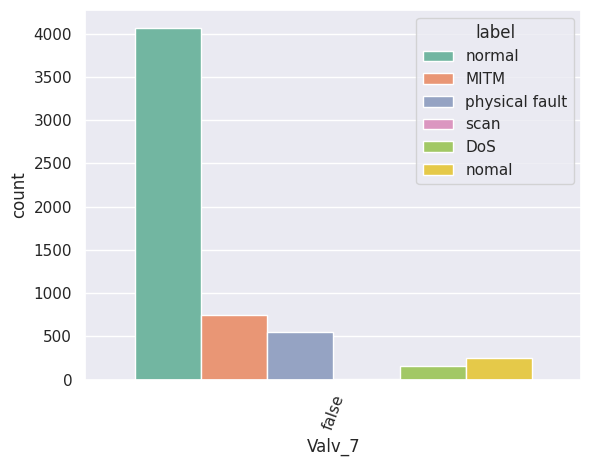

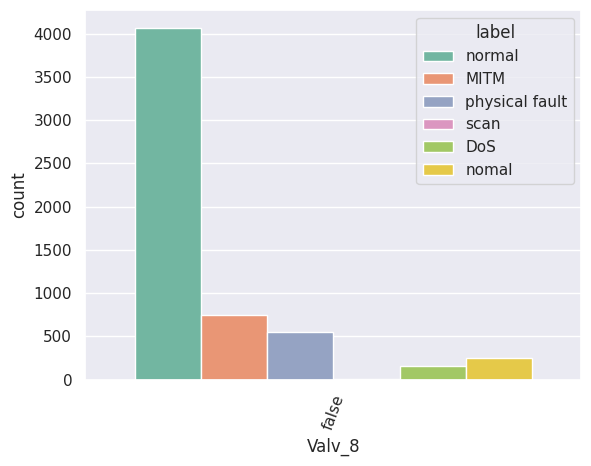

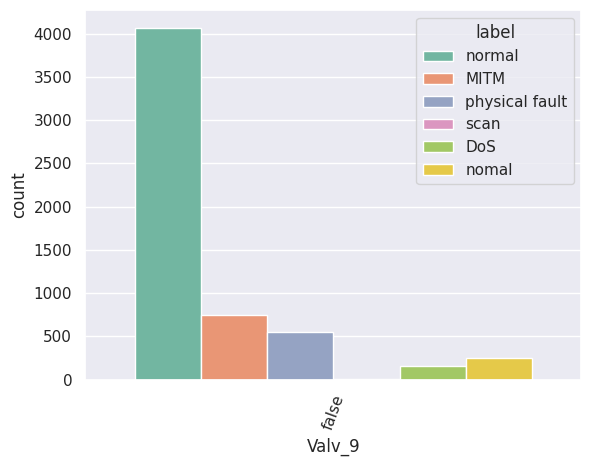

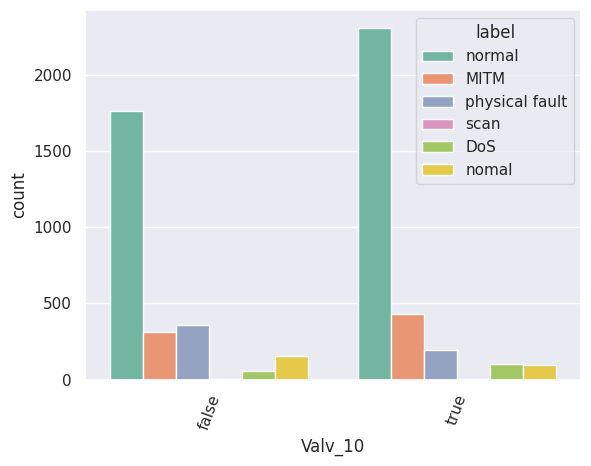

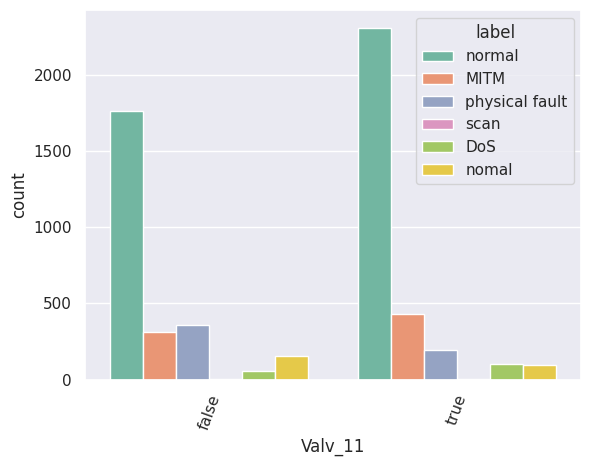

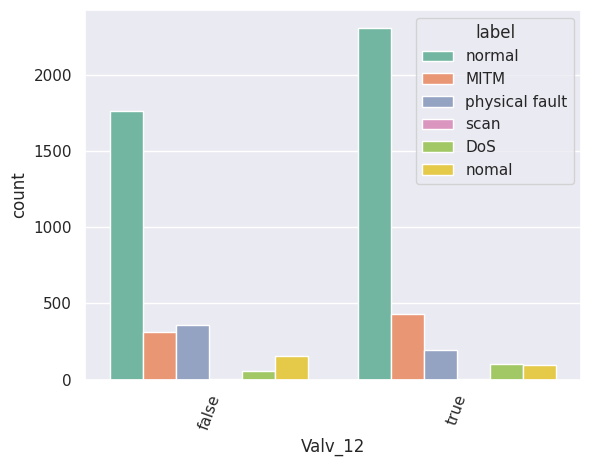

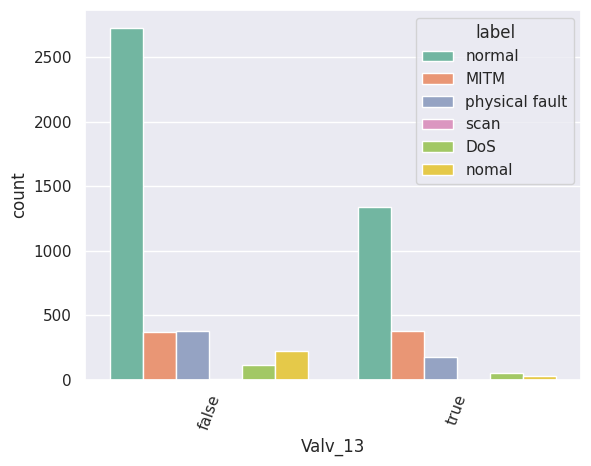

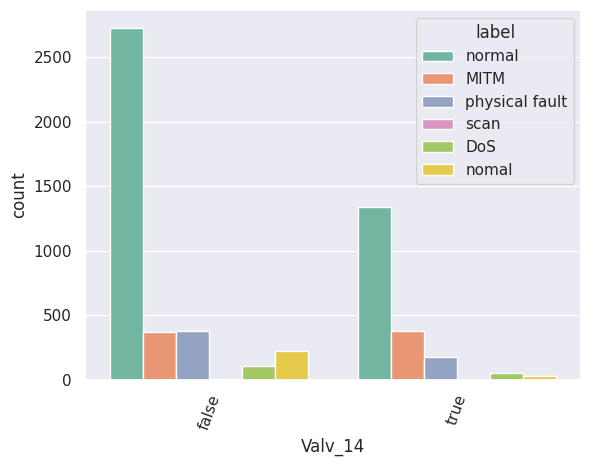

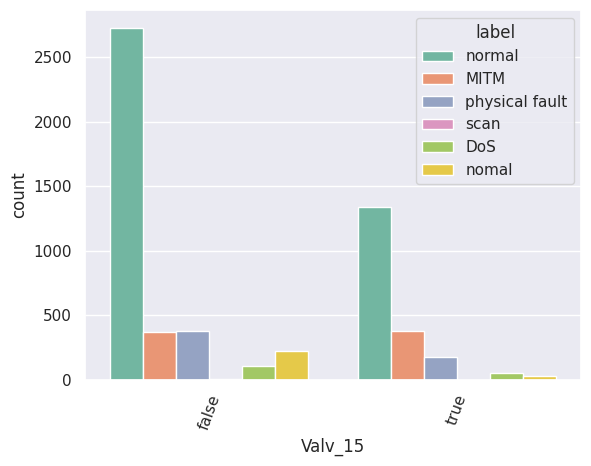

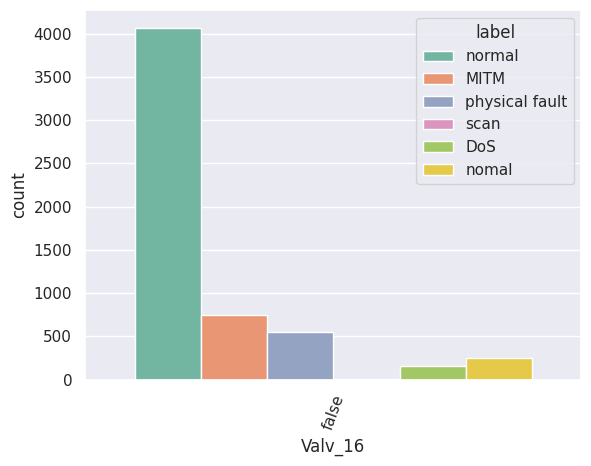

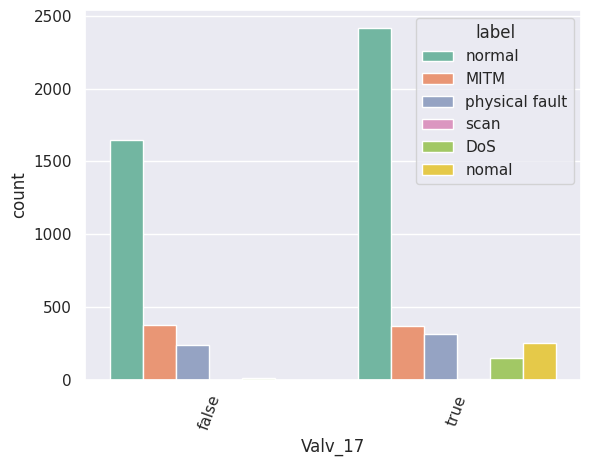

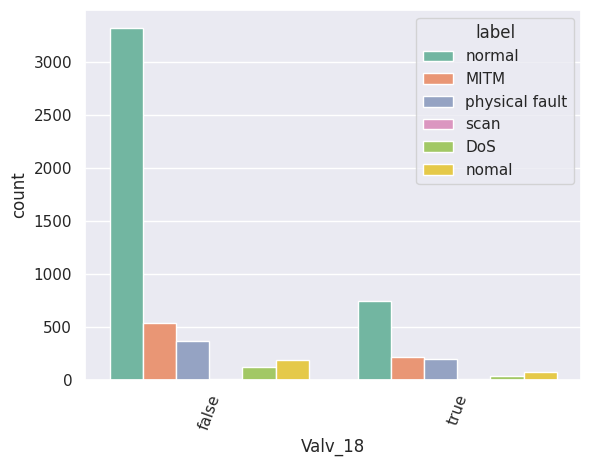

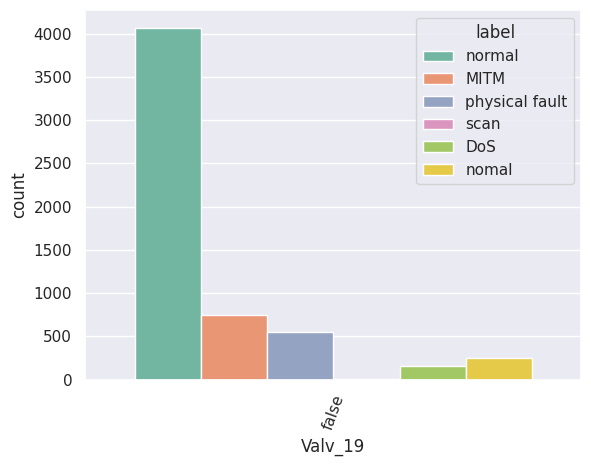

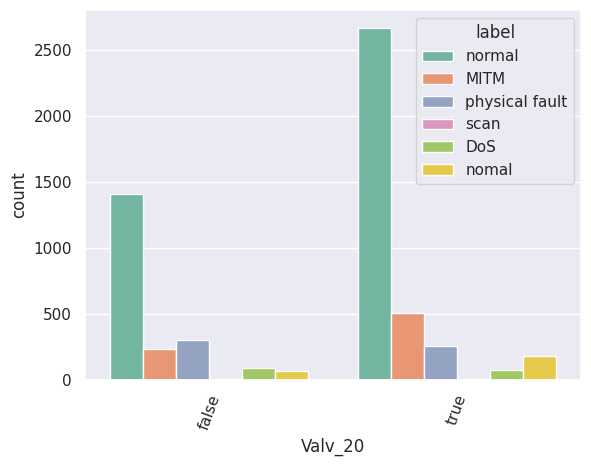

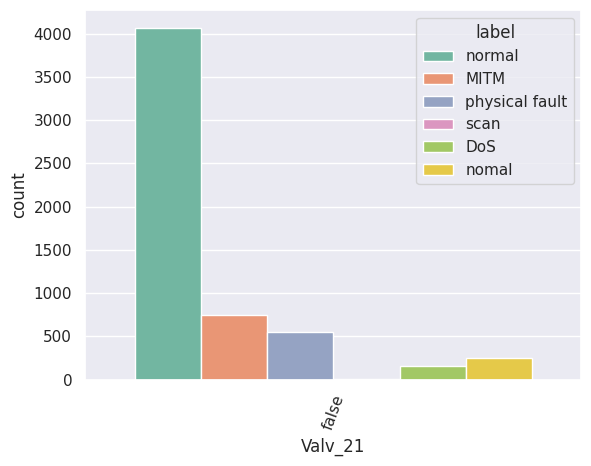

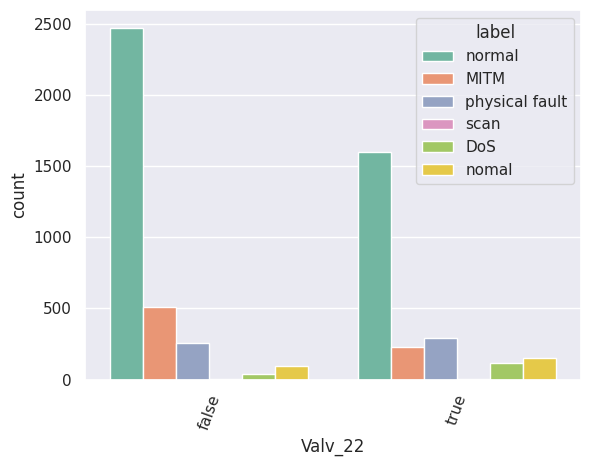

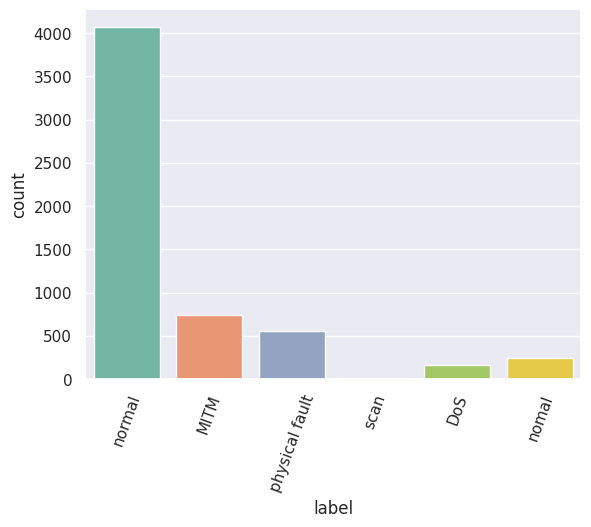

In [5]:
eda.explore_data()

In the course of our exploratory analysis, we have come across several critical insights:

1. **Label Imbalance**:
    - A significant finding is the imbalance among the labels. This imbalance presents a potential bias in model training and will be a key focus in the preprocessing phase to ensure that our model does not inherently favor the majority class.

2. **Challenge in Classifying MINT and DoS**:
    - While the dataset includes instances of MINT (Man-In-The-Network) attacks and Denial of Service (DoS), these are complex to classify accurately using physical sensor data. Given this complexity, we have decided to simplify our classification approach.

3. **Binary Classification Approach**:
    - To address the classification challenges, we will pivot to a binary classification framework. Our categories will be:
        - `Normal`: Denotes regular system behavior without any interference.
        - `Physical Fault`: Denotes anomalies that signal an attack or fault in the system.
    

4. **Feature Correlation**:
    - The dataset contains a vast number of features, among which there is a high degree of correlation. In the preprocessing stage, we will need to tackle this multicollinearity, potentially through feature selection or dimensionality reduction techniques, to improve model performance and interpretability

### 1.2 Network attacks

In [6]:
net_attack.isnull().sum()

Time               0
dport              0
proto              0
flags              0
size               0
modbus_fn    3836580
n_pkt_src        940
n_pkt_dst        940
label              0
dtype: int64

The dataset contains missing values in several columns, with the most prominent gaps in 'ip_s' and 'ip_d' (22 missing values each), 'modbus_fn' (2967 missing values), 'n_pkt_src' and 'n_pkt_dst' (22 missing values each), and 'modbus_response' (51483 missing values), while other columns have no missing data.


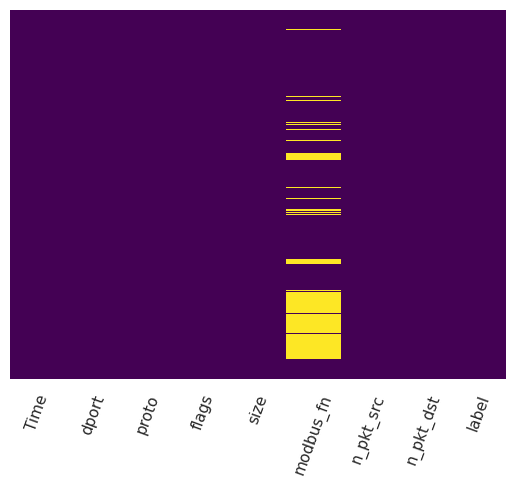

In [7]:
# Plotting missing values count per columns
sns.heatmap(net_attack.isnull(), cbar=False, xticklabels=True, yticklabels=False, cmap='viridis')
plt.xticks(rotation=70)
plt.show()

In [8]:
eda = EDA(net_attack, net_attack._get_numeric_data().columns, net_attack.select_dtypes(include=['object']).columns)

Index(['size', 'n_pkt_src', 'n_pkt_dst'], dtype='object')
Index(['dport', 'proto', 'flags', 'modbus_fn', 'label'], dtype='object')


We analysis the same aspects for the network dataset.

1. **Label Analysis**:
    - Determine the count of unique labels.
    - Examine the distribution of the instances across these labels.

2. **Feature Analysis**:
    - Ascertain the count of distinct features.
    - Investigate the distribution of the values within these features.

3. **Correlation Assessment**:
    - Identify and quantify the interdependencies between different features.

4. **Comparative Feature Analysis**:
    - Contrast and compare how features vary amongst the different labels.

/home/vlad/ing3/Leclerc_SXXI/data_analysis.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=cat_col, data=df, palette="Set2",


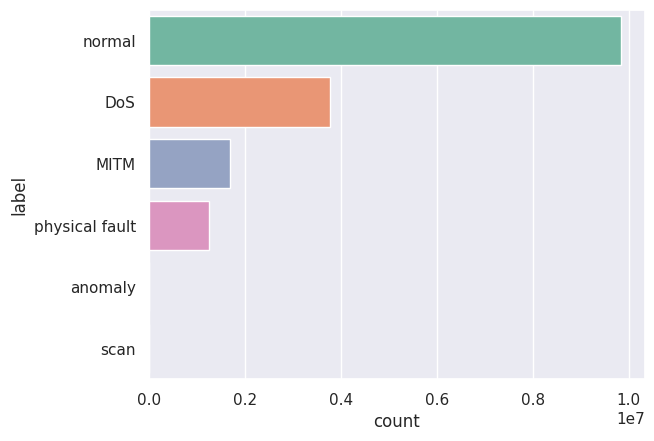

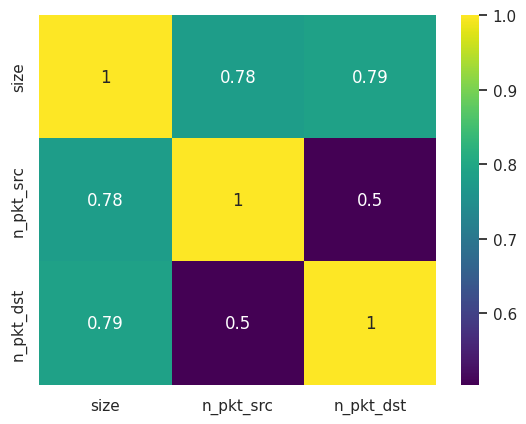

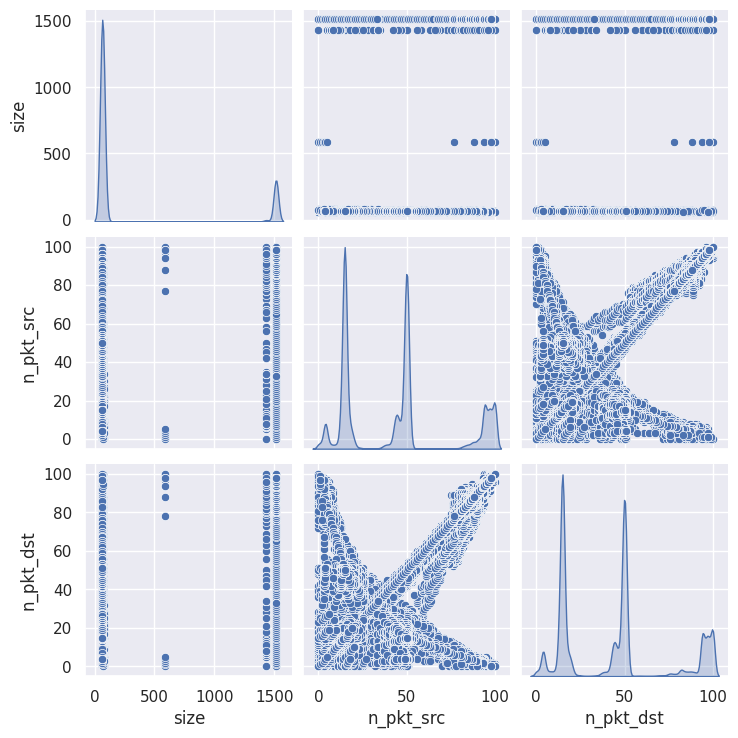

/home/vlad/ing3/Leclerc_SXXI/data_analysis.py:84: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=num_columns[idx], hue=hue,


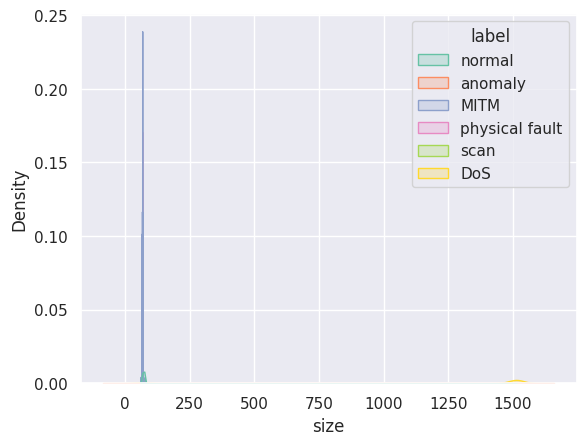

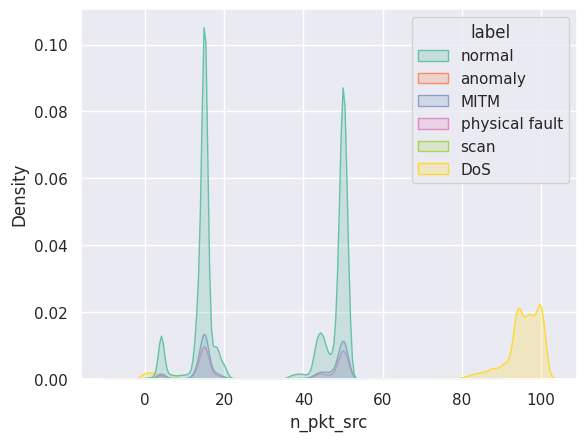

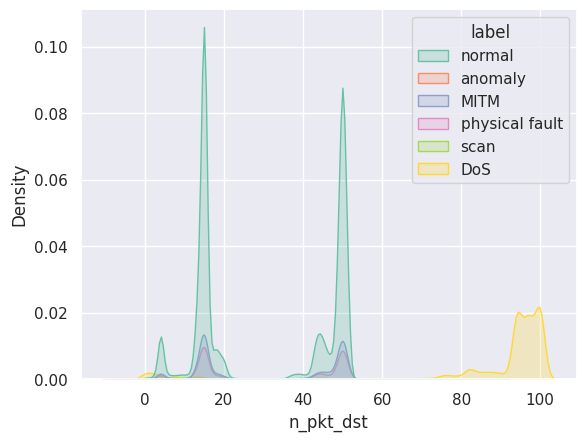

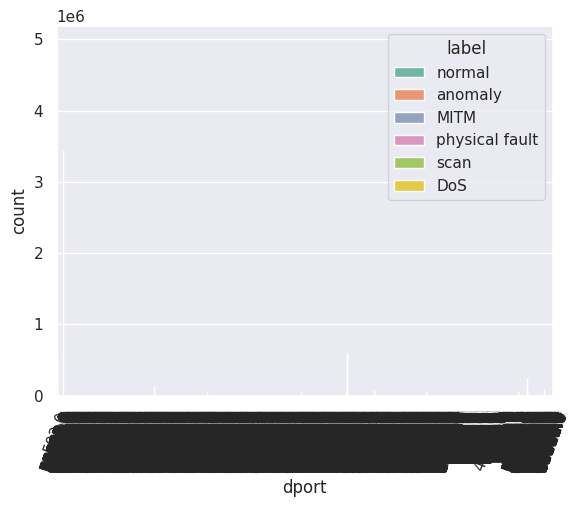

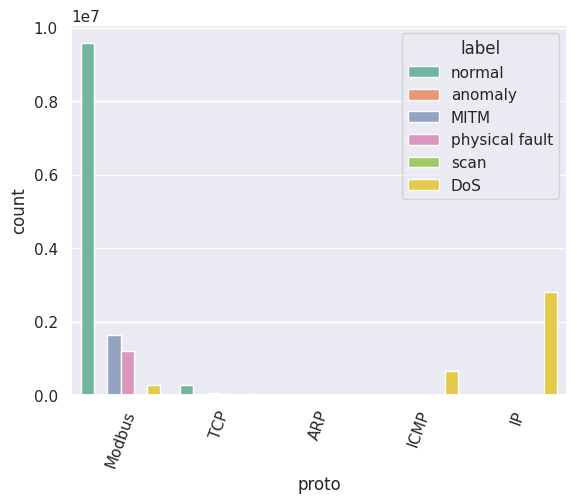

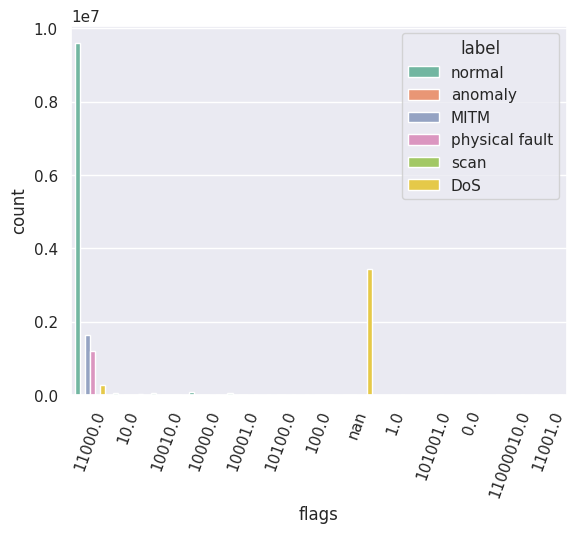

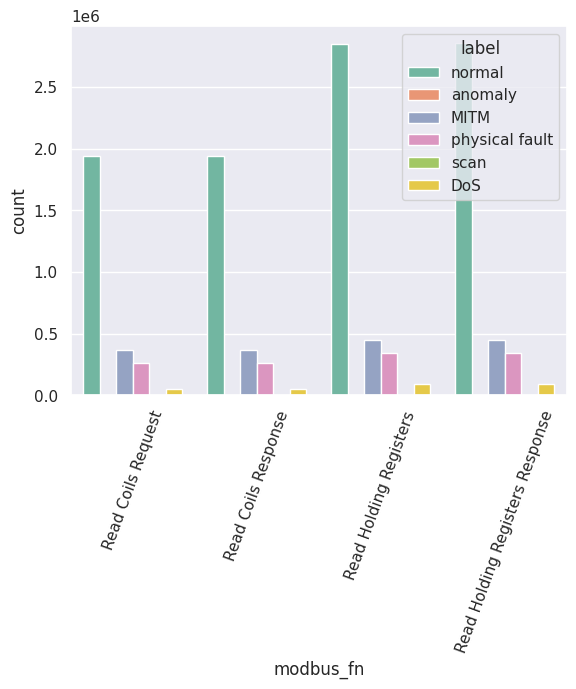

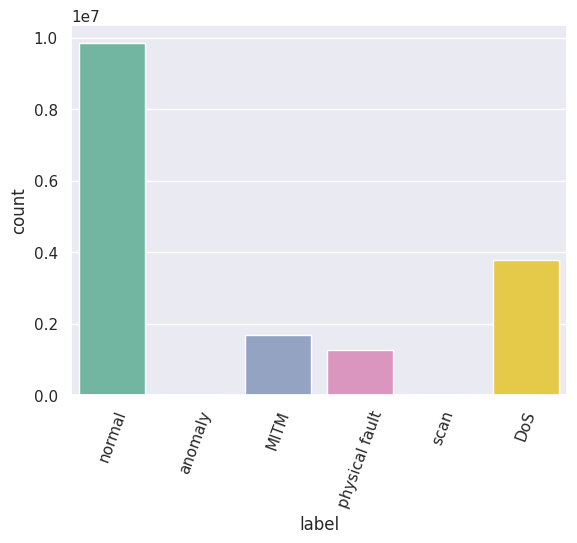

In [9]:
eda.explore_data()

Our exploration of the network dataset has yielded important observations that will shape our data preprocessing strategy:

1. **Label Imbalance**:
    - The dataset is predominantly composed of the `Normal` class, indicating a high class imbalance. Such skewness in the class distribution needs careful attention during preprocessing to avoid a biased predictive model.

2. **Feature Correlation**:
    - Upon analysis, `n_pkt_src` (number of packets from source) and `n_pkt_dst` (number of packets to destination) are found to be highly correlated. To reduce time complexity and potential multicollinearity issues, we will exclude one of these features from our model.

3. **Classification Strategy**:
    - Recognizing the complexity in detecting physical faults through network information, we will employ a multiclass classification strategy to distinguish between `Normal`, `MITM` (Man-In-The-Middle), and `DoS` (Denial of Service) classes.

4. **Feature Preprocessing Requirements**:
    - Our dataset consists of both categorical and numerical features. Categorical features will require encoding to convert them into a machine-readable format, whereas numerical features will be scaled to ensure consistent data range across the model.

5. **Handling Missing Data**:
    - We observe features with a high percentage of missing values (NaNs). We can either remove these features entirely or apply feature engineering to impute them, depending on the significance of the feature to the predictive model.

### Data Preprocessing Plan

The next section will implement data preprocessing steps to address the findings above:

- Address the label imbalance.
- Resolve feature correlation by dropping one of the correlated features.
- Encode categorical features and scale numerical ones.
- Handle features with high occurrences of NaN values appropriately.